In [134]:
import time
import json
import requests
import pandas as pd
from bs4 import BeautifulSoup
#请求数据
url='http://m.sinovision.net/newpneumonia.php'
headers_value={'User-Agent':"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36"}


In [135]:
#提取数据
soup=BeautifulSoup(data.text,'lxml')
work=soup.find_all("div",{'class':"todaydata"})[2]
work=work.find_all("div")
work=list(work)
citys=[];cums=[];deaths=[];
for data in work:
    city = data.find("div",{'class':"prod tags"})
    if (city!=None):
        city = city.find("span",{'class':"area"}).get_text()
        citys.append(city)

    cum = data.find("div", {'class': "prod tags"})
    if (cum != None):
        cum = cum.find("span", {'class': "confirm"}).get_text()
        cums.append(cum)

    death = data.find("div", {'class': "prod tags"})
    if (death != None):
        death= death.find("span", {'class': "dead"}).get_text()
        deaths.append(death)
    #数据处理
    for i in range(len(citys)):
        if cums[i]==None:
            cums[i]=0
        elif deaths[i]==None:
            deaths[i]=0

print("州名称:",citys)
print("确诊:",cums)
print("死亡:",deaths)



州名称: ['California', 'Texas', 'Florida', 'New York', 'Illinois', 'Pennsylvania', 'Ohio', 'Georgia', 'Michigan', 'North Carolina', 'New Jersey', 'Arizona', 'Tennessee', 'Indiana', 'Wisconsin', 'Virginia', 'Massachusetts', 'Minnesota', 'Missouri', 'South Carolina', 'Colorado', 'Alabama', 'Kentucky', 'Washington', 'Louisiana', 'Oklahoma', 'Utah', 'Maryland', 'Iowa', 'Arkansas', 'Mississippi', 'Kansas', 'Nevada', 'Connecticut', 'Oregon', 'New Mexico', 'Nebraska', 'Idaho', 'West Virginia', 'Puerto Rico', 'Rhode Island', 'Montana', 'New Hampshire', 'South Dakota', 'North Dakota', 'Delaware', 'Alaska', 'Maine', 'Wyoming', 'Hawaii', 'District of Columbia', 'Vermont', 'Guam', 'US Virgin Islands', 'Others']
确诊: ['5201644', '4411247', '3739439', '2917910', '1949484', '1874197', '1829367', '1657350', '1611085', '1589348', '1330728', '1330594', '1319000', '1185226', '1054307', '1013390', '1005470', '979407', '972057', '936207', '870865', '856600', '830282', '803098', '780668', '685906', '617840', '5

In [136]:
#数据存储
df=pd.DataFrame()
df['citys']=citys
df['cums']=cums  #确诊
df['deaths']=deaths  #死亡

In [137]:
df.to_csv("data_USA.csv",encoding='utf_8')

In [138]:
df

,citys,cums,deaths
0,California,5201644,75898
1,Texas,4411247,75310
2,Florida,3739439,62220
3,New York,2917910,57989
4,Illinois,1949484,30202
5,Pennsylvania,1874197,35183
6,Ohio,1829367,28028
7,Georgia,1657350,29862
8,Michigan,1611085,27705
9,North Carolina,1589348,19131


In [131]:

data = pd.read_csv('data_USA.csv')


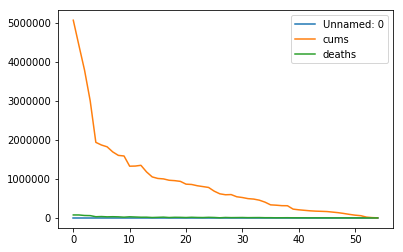

In [78]:
data.plot()

In [86]:

import pandas as pd
from pyecharts.charts import Map,Line
from pyecharts import options as opts
from pyecharts.faker import Faker

In [87]:
data_list=list(zip(citys,cums))

In [88]:
print(data_list)

[('California', '5058204'), ('Texas', '4412997'), ('Florida', '3777960'), ('New York', '2995000'), ('Illinois', '1933291'), ('Pennsylvania', '1865237'), ('Ohio', '1819342'), ('Georgia', '1688806'), ('Michigan', '1599679'), ('North Carolina', '1585074'), ('New Jersey', '1323331'), ('Arizona', '1326908'), ('Tennessee', '1346150'), ('Indiana', '1176411'), ('Wisconsin', '1049261'), ('Virginia', '1009933'), ('Massachusetts', '998400'), ('Minnesota', '963676'), ('Missouri', '953523'), ('South Carolina', '934880'), ('Colorado', '864039'), ('Alabama', '855692'), ('Kentucky', '823213'), ('Washington', '801699'), ('Louisiana', '779567'), ('Oklahoma', '684579'), ('Utah', '616680'), ('Maryland', '592679'), ('Iowa', '597293'), ('Arkansas', '541315'), ('Mississippi', '521544'), ('Kansas', '493492'), ('Nevada', '482138'), ('Connecticut', '454123'), ('Oregon', '404229'), ('New Mexico', '334324'), ('Nebraska', '325655'), ('Idaho', '313423'), ('West Virginia', '311524'), ('Puerto Rico', '224980'), ('Rho

In [89]:
#美国地图可视化
map=(
    Map()
    .add(series_name='确诊人数',
            data_pair=data_list,
            maptype="美国",
            is_map_symbol_show=False)
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))  #关闭名称显示
    .set_global_opts(title_opts=opts.TitleOpts("美国疫情地图"),
                        visualmap_opts=opts.VisualMapOpts(range_color=Faker.visual_color,max_=10000),
                    )
)
map.render_notebook()

    

In [90]:
data_list=list(zip(citys,cums,deaths))
print(data_list)

[('California', '5058204', '75822'), ('Texas', '4412997', '75298'), ('Florida', '3777960', '62191'), ('New York', '2995000', '58970'), ('Illinois', '1933291', '30135'), ('Pennsylvania', '1865237', '35095'), ('Ohio', '1819342', '27594'), ('Georgia', '1688806', '30911'), ('Michigan', '1599679', '27459'), ('North Carolina', '1585074', '19099'), ('New Jersey', '1323331', '28659'), ('Arizona', '1326908', '23344'), ('Tennessee', '1346150', '17939'), ('Indiana', '1176411', '18332'), ('Wisconsin', '1049261', '10610'), ('Virginia', '1009933', '15055'), ('Massachusetts', '998400', '19783'), ('Minnesota', '963676', '10181'), ('Missouri', '953523', '15715'), ('South Carolina', '934880', '14445'), ('Colorado', '864039', '10065'), ('Alabama', '855692', '16320'), ('Kentucky', '823213', '11719'), ('Washington', '801699', '9708'), ('Louisiana', '779567', '14918'), ('Oklahoma', '684579', '11336'), ('Utah', '616680', '3697'), ('Maryland', '592679', '11255'), ('Iowa', '597293', '7680'), ('Arkansas', '5413

In [91]:
#美国确诊与死亡对比
line = (
    Line(opts.InitOpts(width='1000px',height='800px'))
    .add_xaxis(list(df['citys'].values.tolist()))
    .add_yaxis("确诊",df['cums'].values.tolist())
    .add_yaxis("死亡",df['deaths'].values.tolist())
    .set_global_opts(title_opts=opts.TitleOpts(title="美国确诊与死亡对比"),
    )
)
line.render_notebook()
# line.render('美国确诊与死亡对比.html')